In [5]:
import os.path
import albumentations as A
from PIL import Image
import matplotlib.pyplot as plt
import cv2
transform = A.Compose([
            A.AdvancedBlur(rotate_limit=15, p=1)
        ])
transform2 = A.Compose([
            A.ShiftScaleRotate(rotate_limit=15, p=1)
        ])

data_train_hand/TRAIN_00000.png	빨간색 data_train_hand/TRAIN_00001.png	머


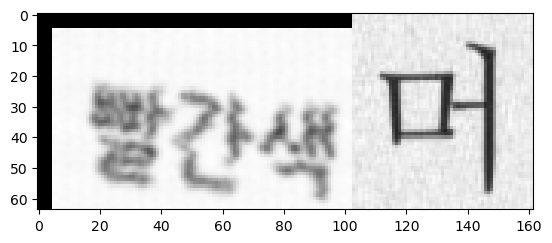

In [8]:
import os.path
import albumentations as A
import numpy as np
from PIL import Image
import cv2
transform = A.Compose([
            A.AdvancedBlur(rotate_limit=15, p=1)
        ])
transform2 = A.Compose([
            A.ShiftScaleRotate(rotate_limit=15, p=1)
        ])
M = np.float32([[1,0,100],[0,1,50]])

list_image = []
with open("train.txt",encoding="utf-8") as f:
    lines = [line.rstrip('\n') for line in f]
    for line in lines:
        content = line.split('\t')[1]
        

        list_image.append(line)
    index = 0
    for i,image in enumerate(list_image[:1]):
        slect_image_1 = list_image[i]

        list_slect_image_2 = list_image[1:2]
        for i in list_slect_image_2:
            print(slect_image_1,i)
            img1_read = cv2.imread(slect_image_1.split('\t')[0], 1)
            img2_read = cv2.imread(i.split('\t')[0], 1)
            height, width, _ = img1_read.shape
            M = np.float32([[1, 0, 5], [0, 1, 5]])

            # perform the translation
            img = cv2.warpAffine(img1_read, M, (width, height))
            img1 = transform(image=img2_read)
            transformed_image = img1['image']

            file_name = str(index) + "_"+slect_image_1.split('\t')[1]+i.split('\t')[1]+str("_.png")
            addh = cv2.hconcat([img, transformed_image])
            plt.imshow(addh)
        index+=1